# 23/CS/301 Piyush Yadav

## Lab 09– Ensemble Learning: Boosting
## Learning Outcomes
### By the end of this lab, students will be able to:
- Implement AdaBoost
- Build sklearn pipeline with preprocessing + classifier
- Evaluate models using accuracy, ROC AUC, and confusion matrix.


### Step 1: Import Libraries

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Train/test split and preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

# Metrics and plotting
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, PrecisionRecallDisplay
)

# Plotting
import matplotlib.pyplot as plt

### Step 2: Load Dataset

In [3]:
# Load the churn dataset
df = pd.read_csv("churn.csv")

# Features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

### Step 3: Identify Columns for Preprocessing

In [4]:
# Categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns

### Step 4: Preprocessing Pipeline

In [11]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols)
    ]
)

### Step 5: Train/Test Split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Step 6: Build Pipeline (Preprocessing + AdaBoost)

In [13]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', AdaBoostClassifier(n_estimators=100, random_state=42))
])

### Step 7: Train the Model

In [14]:
pipeline.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


### Step 8: Make Predictions

In [15]:
# Class predictions
y_pred = pipeline.predict(X_test)

# Probabilities for ROC and Precision-Recall curves
y_prob = pipeline.predict_proba(X_test)[:, 1]

/Users/piyush_yadav/Desktop/projects/Python/ML Lab/.venv/lib/python3.14/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/Users/piyush_yadav/Desktop/projects/Python/ML Lab/.venv/lib/python3.14/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [0, 16] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


### Step 9: Evaluate Model Metrics

In [17]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, pos_label='Yes'))
print("Recall:", recall_score(y_test, y_pred, pos_label='Yes'))
print("F1-score:", f1_score(y_test, y_pred, pos_label='Yes'))


Accuracy: 0.7955997161107168
Precision: 0.656934306569343
Recall: 0.48128342245989303
F1-score: 0.5555555555555556


### Step 10: Plot Confusion Matrix

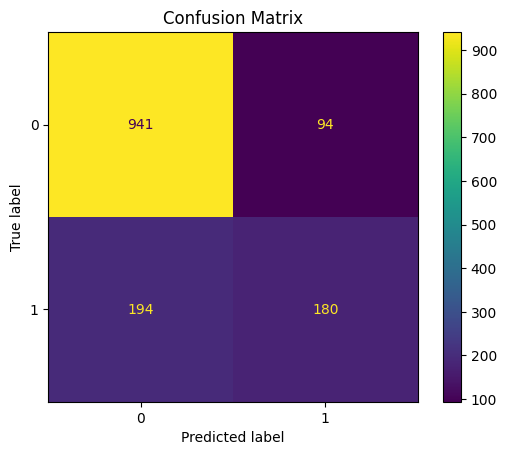

In [18]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix")
plt.show()

### Step 11: Plot ROC Curve

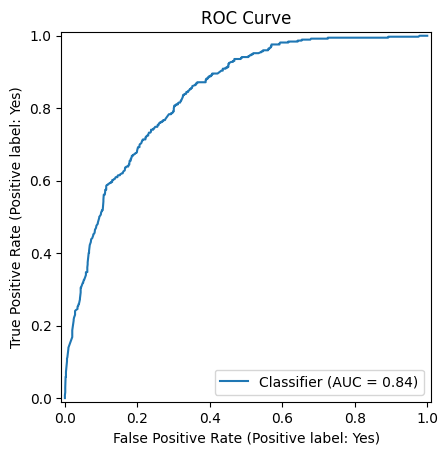

In [20]:
RocCurveDisplay.from_predictions(y_test, y_prob, pos_label='Yes')
plt.title("ROC Curve")
plt.show()

### Step 12: Plot Precision-Recall Curve

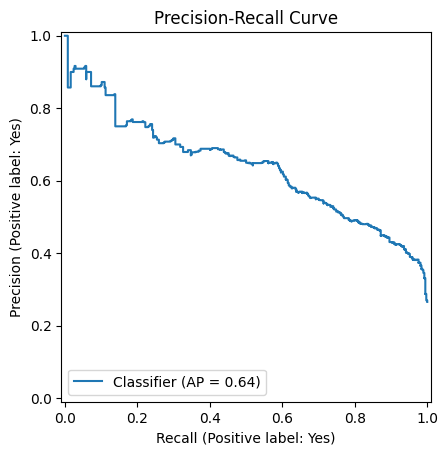

In [21]:
PrecisionRecallDisplay.from_predictions(y_test, y_prob, pos_label='Yes')
plt.title("Precision-Recall Curve")
plt.show()